# Importing Dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
ds1=pd.read_csv('bigdatamart_Train.csv')
ds2=pd.read_csv('bigmart_test.csv')
df_train= pd.DataFrame(ds1)
df_test= pd.DataFrame(ds2)
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_train.shape

(8523, 12)

Rows: 8523, Column: 12 of Train dataset

In [5]:
df_test.shape

(5681, 11)

Rows: 5681, Column: 11 of Test dataset

In [6]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

7 object datatype , 5 numeric datatype

In [7]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Weight has 1463 null value and Outlet_Size has 2410 null value

In [8]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Item_Weight has 976 null value and Outlet_Size has 1606 null value

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Info of train dataset shows that few values are missing

Categorical Feature column:

 1.Item_Identifier
 2.Item_Fat_Content
 3.Item_Type
 4.Outlet_Identifier
 5.Outlet_Size
 6.Outlet_Location_Type
 7.Outlet_Type

In [10]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Describing dataset and it shows missing count in value

### Mean Imputation for filling Item_Weight as it is a Numerical value

In [11]:
print('train mean',df_train['Item_Weight'].mean())
print('test mean',df_test['Item_Weight'].mean())

train mean 12.857645184136183
test mean 12.695633368756374


In [12]:
# Filling train dataset with mean
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
# Filling test dataset with mean
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)
df_train['Item_Weight'].isnull().sum()

0

In [13]:
df_train['Item_Weight'].unique()

array([ 9.3       ,  5.92      , 17.5       , 19.2       ,  8.93      ,
       10.395     , 13.65      , 12.85764518, 16.2       , 11.8       ,
       18.5       , 15.1       , 17.6       , 16.35      ,  9.        ,
       13.35      , 18.85      , 14.6       , 13.85      , 13.        ,
        7.645     , 11.65      ,  5.925     , 19.25      , 18.6       ,
       18.7       , 17.85      , 10.        ,  8.85      ,  9.8       ,
       13.6       , 21.35      , 12.15      ,  6.42      , 19.6       ,
       15.85      ,  7.39      , 10.195     ,  9.895     , 10.895     ,
        7.905     ,  9.195     ,  8.365     ,  7.97      , 17.7       ,
       19.35      ,  8.645     , 15.6       , 18.25      ,  7.855     ,
        7.825     ,  8.39      , 12.85      , 19.        ,  5.905     ,
        7.76      , 16.75      , 15.5       ,  6.055     ,  6.305     ,
       20.85      , 20.75      ,  8.895     , 19.7       ,  8.75      ,
       13.3       ,  8.31      , 19.75      , 17.1       , 10.5 

Nan values filled with mean in Item_weight column

### Outlet_Size is catagorical column so we fill it with Mode Imputation

In [14]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Size has 3 category

In [15]:
df_train['Outlet_Size'].mode()

0    Medium
dtype: object

Outlet_Size has Medium as mode

In [16]:
# Filling train dataset with mode
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
# Filling test dataset with mode
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [17]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

No null value in train dataset

In [18]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

No null value in test dataset

In [19]:
df_train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Filled Outlet size column with mode  value.

### Dropping Item_Identifier and Outlet_Identifier column from train and test dataset

In [20]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True) #dropping from train dataset
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)  #dropping from test dataset

In [21]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


 Item_Identifier and Outlet_Identifier column dropped

## Item_Visibility with Mean Imputation

In [22]:
print(df_train['Item_Visibility'].value_counts())
print('train mean',df_train['Item_Visibility'].mean())

0.000000    526
0.076975      3
0.072238      2
0.080766      2
0.058543      2
           ... 
0.024343      1
0.041823      1
0.023154      1
0.047783      1
0.031007      1
Name: Item_Visibility, Length: 7880, dtype: int64
train mean 0.06613202877895127


train dataset mean 0.06613202877895127

In [23]:
print(df_test['Item_Visibility'].value_counts())
print('test mean',df_test['Item_Visibility'].mean())

0.000000    353
0.080293      2
0.041525      2
0.052059      2
0.026836      2
           ... 
0.064403      1
0.053775      1
0.038746      1
0.057255      1
0.042629      1
Name: Item_Visibility, Length: 5277, dtype: int64
test mean 0.06568385968808292


train dataset mean 0.065

In [24]:
# replace zeros with mean
df_train.loc[:, 'Item_Visibility'].replace([0], [df_train['Item_Visibility'].mean()], inplace=True)
# replace zeros with mean
df_test.loc[:, 'Item_Visibility'].replace([0], [df_test['Item_Visibility'].mean()], inplace=True)

In [25]:
df_test['Item_Visibility'].value_counts()

0.065684    353
0.046635      2
0.103652      2
0.159518      2
0.060091      2
           ... 
0.067584      1
0.064403      1
0.053775      1
0.038746      1
0.042629      1
Name: Item_Visibility, Length: 5277, dtype: int64

Replaced the value 0.00 from Item_Visibility column.

In [26]:
#Item_Fat_Content values
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

Item_Fat_Content value needs to be replaced

In [27]:
#Replacing value of train dataset:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
#Replacing value of test dataset:
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [28]:
print(df_train['Item_Fat_Content'].unique())
print(df_test['Item_Fat_Content'].unique())

['Low Fat' 'Regular']
['Low Fat' 'Regular']


Item_Fat_Content has 2 category now

# Data Analysis

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Columns in train dataset

## Distplot for numeric datatype

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

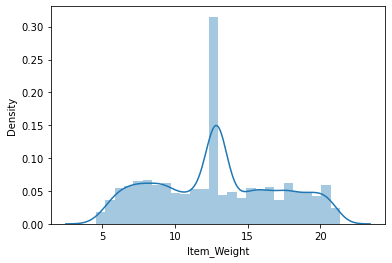

In [31]:
sns.distplot(df_train['Item_Weight'], kde=True)

data is not normally distributed, skewness present

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

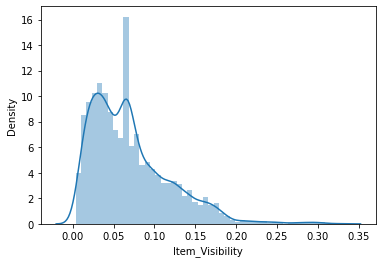

In [32]:
sns.distplot(df_train['Item_Visibility'], kde=True)

data is not normally distributed, skewness present

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

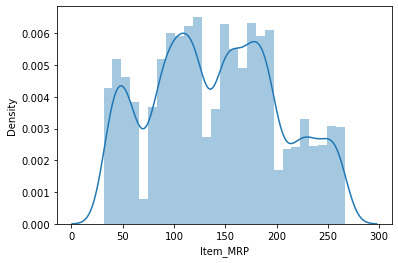

In [33]:
sns.distplot(df_train['Item_MRP'], kde=True)

data is not normally distributed, skewness present

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

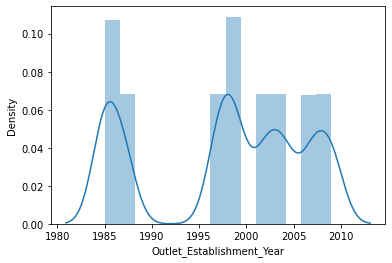

In [34]:
sns.distplot(df_train['Outlet_Establishment_Year'], kde=True)

data is not normally distributed, skewness present

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

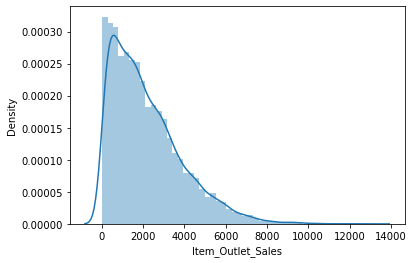

In [35]:
sns.distplot(df_train['Item_Outlet_Sales'], kde=True)

data is not normally distributed, skewness present

## Catplot for categorical data

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


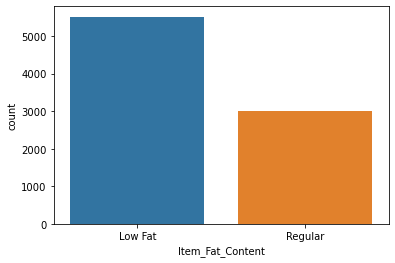

In [36]:
ax=sns.countplot(x="Item_Fat_Content", data=df_train)
print(df_train["Item_Fat_Content"].value_counts())

Item_Fat_Content has 2 categories Low Fat and Regular

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


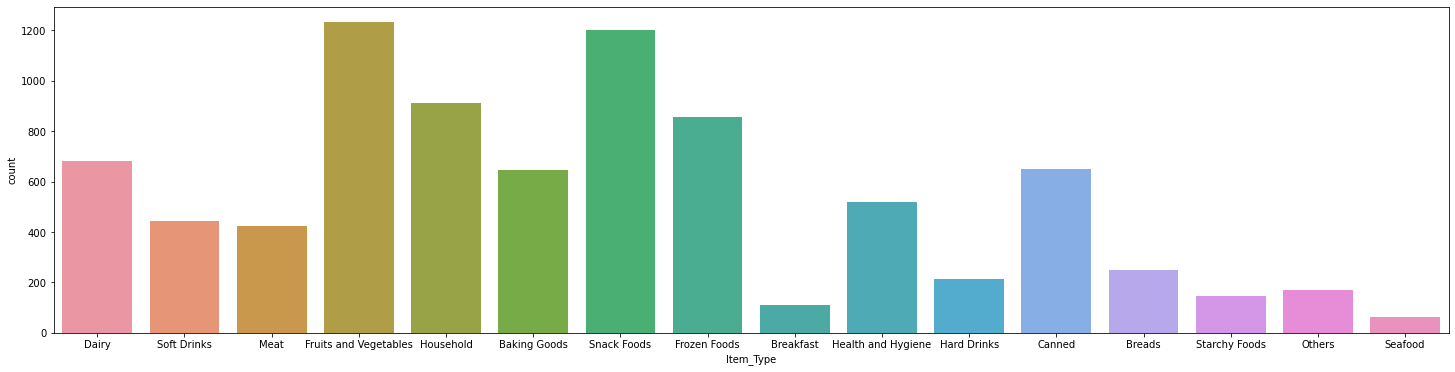

In [37]:
plt.figure(figsize=(25,6))
ax=sns.countplot(x="Item_Type", data=df_train)
print(df_train["Item_Type"].value_counts())

Item_Type column has many categories
Fruits and vegetables ,snack foods categories has maximum products 

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


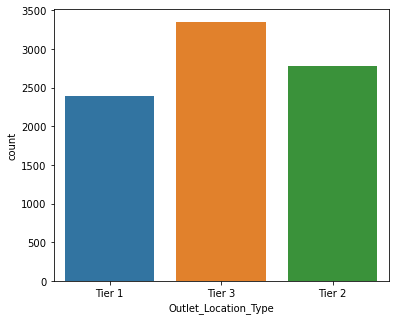

In [38]:
plt.figure(figsize=(6,5))
ax=sns.countplot(x="Outlet_Location_Type", data=df_train)
print(df_train["Outlet_Location_Type"].value_counts())

Outlet_Location_Type has 3 categories Tier1 , 2 and 3 and the maximum one is tier 3

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


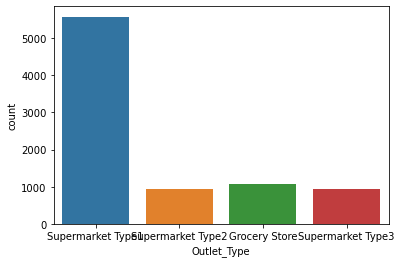

In [38]:
ax=sns.countplot(x="Outlet_Type", data=df_train)
print(df_train["Outlet_Type"].value_counts())

Outlet_Type has 4 categories and out of them supermarket type is maximum

C:\Users\rajbi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

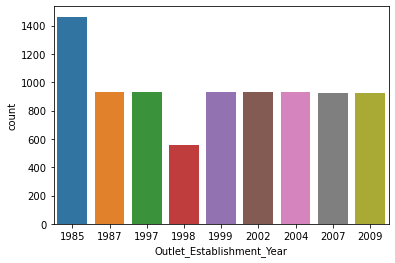

In [39]:
sns.countplot(df_train['Outlet_Establishment_Year'])

1985 year has maximum number of store extablished

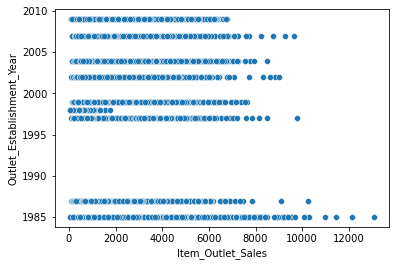

In [40]:
g=sns.scatterplot(x="Item_Outlet_Sales",y="Outlet_Establishment_Year",data=df_train)

Range of maximum item outlet sales from 1985 to 2010 is between 0 to 8000

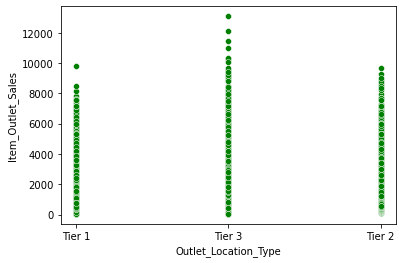

In [41]:
g=sns.scatterplot(x="Outlet_Location_Type",y="Item_Outlet_Sales",data=df_train,color='g')

Tier 3 of Outlet location type has maximum item outlet sale

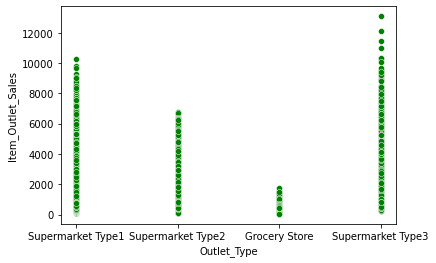

In [42]:
g=sns.scatterplot(x="Outlet_Type",y="Item_Outlet_Sales",data=df_train,color='g')

Supermarket Type 3 has maximum number of sales 

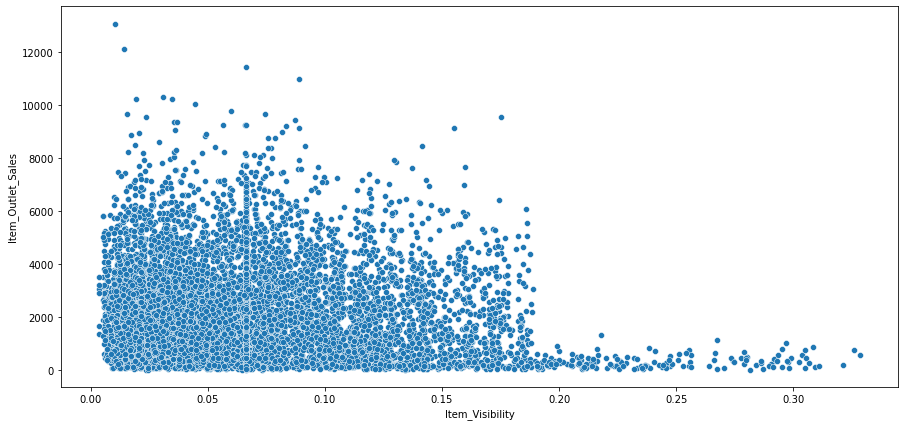

In [43]:
plt.figure(figsize=(15,7))
g=sns.scatterplot(x="Item_Visibility",y="Item_Outlet_Sales",data=df_train)

Item visibility has higher concentration at 0.0 to 0.15 range so sale is higher

In [44]:
df_train.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

5 Object datatype and 5 numeric datatype

## Label Encoding of Object datatype

In [39]:
from sklearn.preprocessing import LabelEncoder
en= LabelEncoder()

df_train['Item_Fat_Content'] = en.fit_transform(df_train['Item_Fat_Content'])
df_test['Item_Fat_Content'] = en.fit_transform(df_test['Item_Fat_Content'])

df_train['Item_Type'] = en.fit_transform(df_train['Item_Type'])
df_test['Item_Type'] =en.fit_transform(df_test['Item_Type'])

df_train['Outlet_Size'] = en.fit_transform(df_train['Outlet_Size'])
df_test['Outlet_Size'] = en.fit_transform(df_test['Outlet_Size'])

df_train['Outlet_Location_Type'] = en.fit_transform(df_train['Outlet_Location_Type'])
df_test['Outlet_Location_Type'] = en.fit_transform(df_test['Outlet_Location_Type'])

df_train['Outlet_Type'] = en.fit_transform(df_train['Outlet_Type'])
df_test['Outlet_Type'] = en.fit_transform(df_test['Outlet_Type'])

In [40]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.066132,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.066132,9,53.8614,1987,0,2,1,994.7052


Object Data encoded

## Describing the dataset

In [47]:
df_train.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.070213,7.226681,140.992782,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,4.226124,0.477836,0.048742,4.209990,62.275067,8.371760,0.600327,0.812757,0.796459,1706.499616
min,4.555000,0.000000,0.003575,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.310000,0.000000,0.033085,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,12.857645,0.000000,0.062517,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,21.350000,1.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000,13086.964800


Key Observations:

Mean and Median: Values of mean and median have large difference so skewness present.
75% percentile and max: Item_Outlet_Sales and Item_MRP have large difference so Outliers are present.
Standard deviation is less than mean so high peak data

<AxesSubplot:>

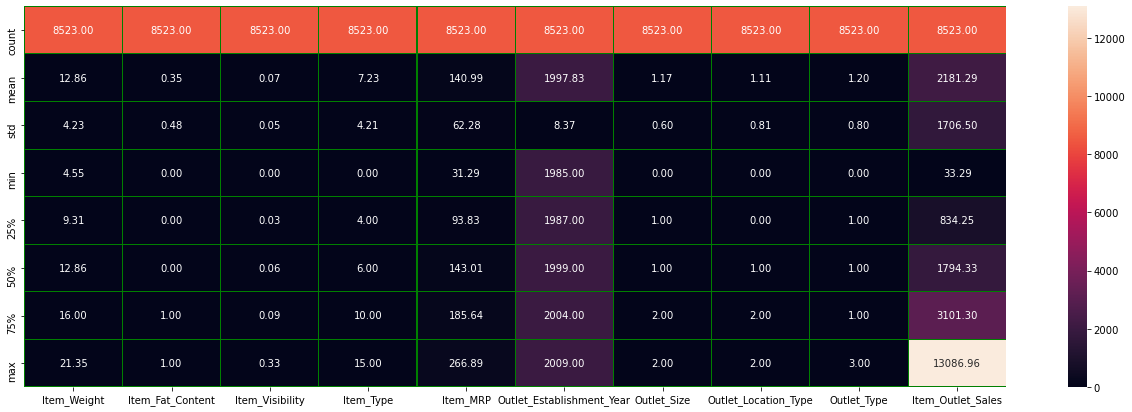

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df_train.describe(),annot=True,linewidths=0.1,linecolor="Green",fmt="0.2f")

Heatmap representation of dataset description

## Outliers

Item_Weight                      AxesSubplot(0.125,0.71587;0.110714x0.16413)
Item_Fat_Content              AxesSubplot(0.257857,0.71587;0.110714x0.16413)
Item_Visibility               AxesSubplot(0.390714,0.71587;0.110714x0.16413)
Item_Type                     AxesSubplot(0.523571,0.71587;0.110714x0.16413)
Item_MRP                      AxesSubplot(0.656429,0.71587;0.110714x0.16413)
Outlet_Establishment_Year     AxesSubplot(0.789286,0.71587;0.110714x0.16413)
Outlet_Size                     AxesSubplot(0.125,0.518913;0.110714x0.16413)
Outlet_Location_Type         AxesSubplot(0.257857,0.518913;0.110714x0.16413)
Outlet_Type                  AxesSubplot(0.390714,0.518913;0.110714x0.16413)
Item_Outlet_Sales            AxesSubplot(0.523571,0.518913;0.110714x0.16413)
dtype: object

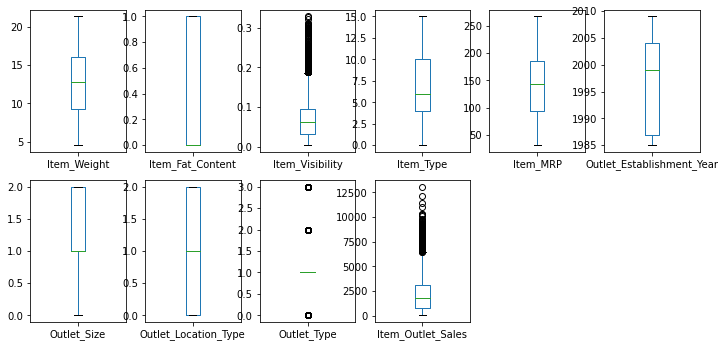

In [41]:
df_train.plot(kind='box',subplots=True,layout=(4,6),figsize=(12,12))

Item_Outlet_Sales, Outlet_Type and Item_Visibility has outliers

In [42]:
#zscore for outlier removal

from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df_train))
threshold=3
np.where(z>3)

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
         456,  472,  502,  521,  532,  661,  694,  753,  809,  847,  854,
         935,  991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324,
        1434, 1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827,
        1841, 1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324,
        2439, 2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017,
        3083, 3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474,
        3488, 3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993,
        4006, 4219, 4289, 4346, 4349, 4382, 4408, 4530, 4538, 4656, 4674,
        4676, 4681, 4772, 4789, 4888, 4941, 4961, 4987, 4991, 5031, 5050,
        5065, 5150, 5177, 5185, 5223, 5287, 5315, 5374, 5500, 5550, 5619,
        5732, 5734, 5752, 5795, 5799, 5812, 5837, 5880, 5891, 5946, 5977,
        6000, 6008, 6012, 6134, 6179, 6334, 6409, 6536, 6537, 6541, 6576,
        6606, 6622, 6674, 6786, 6886, 

In [43]:
#removing value greater than threshold value 

df_new=df_train[(z<3).all(axis=1)]
df_train= df_new


Outliers removed

In [44]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.066132,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.066132,9,53.8614,1987,0,2,1,994.7052


In [45]:
df_train.shape

(8334, 10)

Rows: 8334 ; Column: 10

#### Percentage Loss of data

In [46]:
Data_loss=((8523-8334)/8523)*100
Data_loss

2.2175290390707496

2.21% data lost

## Skewness: 

In [47]:
# Independent data:
x= df_train.iloc[:,0:-1]

# Target label
y= df_train.iloc[:,-1]

from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

D:\Anaconda\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Taking range of skewness between +/- 0.5, only Height has maximum skewness so need to remove skewness

In [48]:
x

array([[-0.8168068 , -0.73691762, -1.44257671, ..., -0.28731953,
        -1.376027  , -0.13560985],
       [-1.7244954 ,  1.35700378, -1.31329917, ..., -0.28731953,
         1.09519263,  1.05665568],
       [ 1.079394  , -0.73691762, -1.41369515, ..., -0.28731953,
        -1.376027  , -0.13560985],
       ...,
       [-0.49243906, -0.73691762, -0.73416897, ...,  1.3929233 ,
        -0.12653776, -0.13560985],
       [-1.36526113,  1.35700378,  1.55313536, ..., -0.28731953,
         1.09519263,  1.05665568],
       [ 0.48946968, -0.73691762, -0.423479  , ...,  1.3929233 ,
        -1.376027  , -0.13560985]])

Skewness removed

In [49]:
x=pd.DataFrame(x)
#x.skew()

Skewness removed

# Correlation of the columns with the target columns:

In [50]:
df_train.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.020417,-0.016207,0.028766,0.024111,-0.008605,-0.007766,0.005380,-0.001604,0.010810
Item_Fat_Content,-0.020417,1.000000,0.051874,-0.139009,0.006969,0.004257,-0.001106,-0.002907,0.004133,0.022502
Item_Visibility,-0.016207,0.051874,1.000000,-0.037990,-0.004676,-0.045693,0.046831,-0.014491,-0.123669,-0.095377
Item_Type,0.028766,-0.139009,-0.037990,1.000000,0.031651,0.006132,-0.001879,0.003324,0.001245,0.016662
Item_MRP,0.024111,0.006969,-0.004676,0.031651,1.000000,0.020052,0.007022,-0.004895,-0.021158,0.569987
Outlet_Establishment_Year,-0.008605,0.004257,-0.045693,0.006132,0.020052,1.000000,0.208081,-0.092940,-0.118278,-0.024110
Outlet_Size,-0.007766,-0.001106,0.046831,-0.001879,0.007022,0.208081,1.000000,-0.610399,-0.193595,-0.077188
Outlet_Location_Type,0.005380,-0.002907,-0.014491,0.003324,-0.004895,-0.092940,-0.610399,1.000000,0.466261,0.066895
Outlet_Type,-0.001604,0.004133,-0.123669,0.001245,-0.021158,-0.118278,-0.193595,0.466261,1.000000,0.368229
Item_Outlet_Sales,0.010810,0.022502,-0.095377,0.016662,0.569987,-0.024110,-0.077188,0.066895,0.368229,1.000000


correlation of input with target variable Item_Outlet_Sales

<AxesSubplot:>

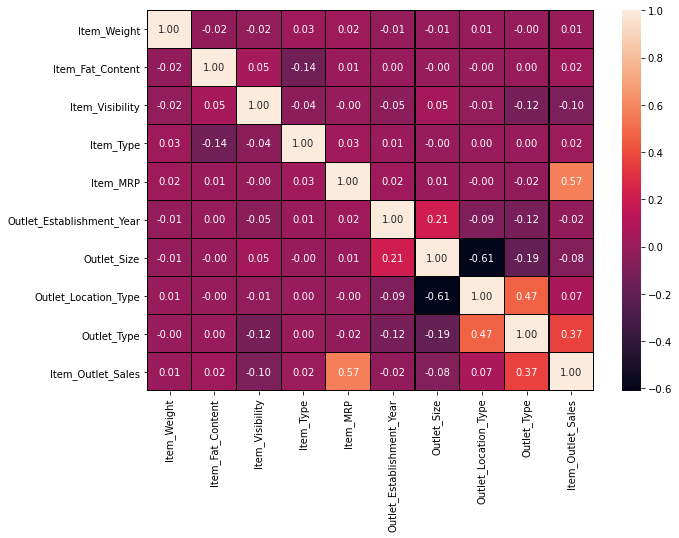

In [51]:
plt.figure(figsize=(10,7))
sns.heatmap(df_train.corr(),annot=True,linewidths=0.1,linecolor="Black",fmt="0.2f")

Key Observation:
 1. Item_Outlet_Sales have positive correlation with Item_MRP and negative correlation with Item_Visibility
 2. Item_MRP has negative correlation with Outlet_Type and positive correlation with Item_Outlet_Sales
 3. Multicollinearity exist

### Multicollinearity removal using VIF

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [54]:
vif_calc()

   VIF Factor  features
0    1.002683         0
1    1.024939         1
2    1.031325         2
3    1.025621         3
4    1.002643         4
5    1.047500         5
6    1.664515         6
7    1.840935         7
8    1.229488         8


## Data Cleaning:

In [55]:
df_train.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)
df_train.head()

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700
3,19.20,1,0.066132,6,182.0950,1,2,0,732.3800
4,8.93,0,0.066132,9,53.8614,0,2,1,994.7052


# Scaling Data

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.8168068 , -0.73691762, -1.44257671, ..., -0.28731953,
        -1.376027  , -0.13560985],
       [-1.7244954 ,  1.35700378, -1.31329917, ..., -0.28731953,
         1.09519263,  1.05665568],
       [ 1.079394  , -0.73691762, -1.41369515, ..., -0.28731953,
        -1.376027  , -0.13560985],
       ...,
       [-0.49243906, -0.73691762, -0.73416897, ...,  1.3929233 ,
        -0.12653776, -0.13560985],
       [-1.36526113,  1.35700378,  1.55313536, ..., -0.28731953,
         1.09519263,  1.05665568],
       [ 0.48946968, -0.73691762, -0.423479  , ...,  1.3929233 ,
        -1.376027  , -0.13560985]])

# Model Selection :

## Linear Regression:

In [57]:
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [58]:
for i in range(0,100):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(train_x,train_y)
    pred_train=lr.predict(train_x)
    pred_test=lr.predict(test_x)
    print(f"At random state {i},the training accuracy is:- {r2_score(train_y,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(test_y,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.507760029405971
At random state 0,the testing accuracy is:- 0.5493795087038106


At random state 1,the training accuracy is:- 0.5180904246685417
At random state 1,the testing accuracy is:- 0.5082369653334385


At random state 2,the training accuracy is:- 0.5137545320493101
At random state 2,the testing accuracy is:- 0.5262058627663113


At random state 3,the training accuracy is:- 0.5167723640254178
At random state 3,the testing accuracy is:- 0.5142831209703781


At random state 4,the training accuracy is:- 0.5168124593436474
At random state 4,the testing accuracy is:- 0.5142352862912623


At random state 5,the training accuracy is:- 0.5177964008068716
At random state 5,the testing accuracy is:- 0.509551593439606


At random state 6,the training accuracy is:- 0.5202251497258659
At random state 6,the testing accuracy is:- 0.5012153158373798


At random state 7,the training accuracy is:- 0.5145572318631083
At random state 7,the testing accur

At random state 73,the training accuracy is:- 0.5244002695164742
At random state 73,the testing accuracy is:- 0.48358607345486104


At random state 74,the training accuracy is:- 0.5213575310944087
At random state 74,the testing accuracy is:- 0.4955021196500089


At random state 75,the training accuracy is:- 0.5227539133787772
At random state 75,the testing accuracy is:- 0.4884103937726355


At random state 76,the training accuracy is:- 0.5125747089200547
At random state 76,the testing accuracy is:- 0.5311056418234471


At random state 77,the training accuracy is:- 0.5205437624905658
At random state 77,the testing accuracy is:- 0.4985737595651736


At random state 78,the training accuracy is:- 0.5195734655852197
At random state 78,the testing accuracy is:- 0.5022985576009047


At random state 79,the training accuracy is:- 0.5143129958276786
At random state 79,the testing accuracy is:- 0.5241769613322933


At random state 80,the training accuracy is:- 0.5094043519074838
At random state 8

In [67]:
lr.fit(train_x,train_y)
lr.score(test_x,test_y)

0.524274683915751

52% is Linear regression score

In [68]:
#Predicted data
pred=lr.predict(test_x)
pred

array([1107.85520816, 1541.34060747, 3836.16845494, ..., 2532.78198897,
       3746.94509736, 3566.98539906])

In [69]:
print("Mean squared error:",mean_squared_error(test_y,pred))
print("Mean absolute error:",mean_absolute_error(test_y,pred))
print("R2Score:",r2_score(test_y,pred))

Mean squared error: 1249390.886148443
Mean absolute error: 860.1619690448974
R2Score: 0.524274683915751


R2Score is 52.4%

## Cross-Validation of the model:

In [59]:
Train_accuracy=r2_score(train_y,pred_train)
Test_accuracy=r2_score(test_y,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.5157348475360966 and accuracy score for training is 0.5138305376257353 and accuracy for the testing is 0.524274683915751


At cross fold 3 the cv score is 0.5151913411631476 and accuracy score for training is 0.5138305376257353 and accuracy for the testing is 0.524274683915751


At cross fold 4 the cv score is 0.5142096871980208 and accuracy score for training is 0.5138305376257353 and accuracy for the testing is 0.524274683915751


At cross fold 5 the cv score is 0.5147539467066371 and accuracy score for training is 0.5138305376257353 and accuracy for the testing is 0.524274683915751


At cross fold 6 the cv score is 0.5151526078559744 and accuracy score for training is 0.5138305376257353 and accuracy for the testing is 0.524274683915751


At cross fold 7 the cv score is 0.515136398683608 and accuracy score for training is 0.5138305376257353 and accuracy for the testing is 0.524274683915751


At cross fold 8 the cv score is 0.5146592249479771 and accu

Since the number of folds dont have such impact on the accuracy and cv_score. So cv=5 is selected.

Hence we handled the problem of the overfitting and the underfitting by checking the training and testing score.

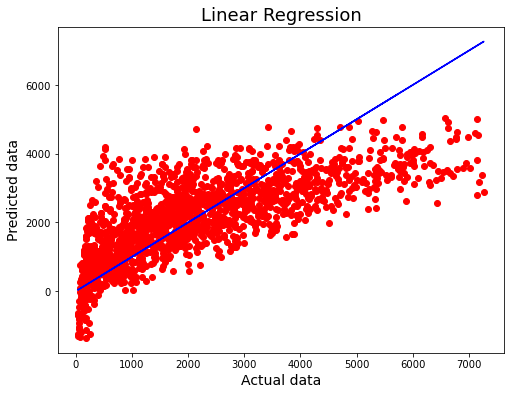

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=pred_test, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization

In [72]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [73]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1,10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


Best parameters for Linear Regression 

In [74]:
ls = Lasso(alpha=0.1,random_state=0)
ls.fit(train_x,train_y)
ls.score(train_x,train_y)
print('ls score',ls.score(train_x,train_y))
pred_ls = ls.predict(test_x)

r2s = r2_score(test_y,pred_ls)
print('r2 score',r2s*100)

ls score 0.5138304839859609
r2 score 52.42856010406211


Ls score is 51% and r2score is 52.4%

In [75]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5147568417873025

CV_mean value is 51.4%

# Random Forest Regressor

In [86]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

KeyboardInterrupt: 

Best parameters for RandomForestRegressor

In [ ]:
rf= RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(train_x,train_y)
rf.score(train_x,train_y)
pred_decision = rf.predict(test_x)
print('rf score',rf.score(train_x,train_y))
rfs = r2_score(test_y,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=9)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=pred_decision, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('Random Forest Regressor',fontsize=18)
plt.show()

# Decision Tree Regressor

In [78]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

parameters = {'criterion':['mse', 'mae'],
              'max_features':["auto","sqrt", "log2"],
              'max_depth':[2,4,8,10,None],
            'min_samples_split':[0.25,0.5,1.0]}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 0.25}


Best parameters for DecisionTreeRegressor 

In [79]:
dt =DecisionTreeRegressor(criterion="mse",max_features="auto",max_depth=8,min_samples_split=0.25)
dt.fit(train_x,train_y)
dt.score(train_x,train_y)
pred_decision = dt.predict(test_x)
print('dt score',dt.score(train_x,train_y))
dts = r2_score(test_y,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,x,y,cv=9)
dtc = dtscore.mean()
print('Cross Val Score:',dtc*100)
print("Mean squared error:",mean_squared_error(test_y,pred_decision))
print("Mean absolute error:",mean_absolute_error(test_y,pred_decision))

dt score 0.570855223210259
R2 Score: 58.71688937642343
Cross Val Score: 56.619654393922126
Mean squared error: 1084212.6836869905
Mean absolute error: 765.8152879559922


dt score 57%
R2 Score: 58.7%
Cross Val Score: 56.6%

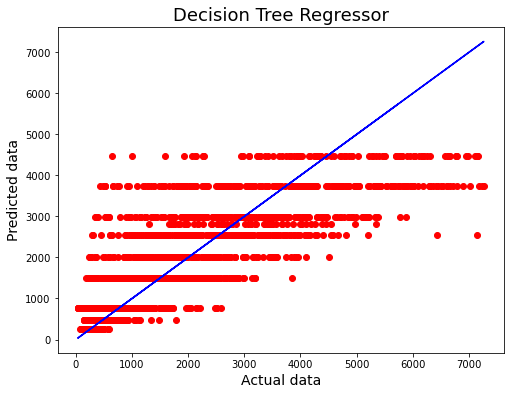

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=pred_decision, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('Decision Tree Regressor',fontsize=18)
plt.show()

# KNeighborsRegressor

In [81]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error

parameters = {'n_neighbors':list(range(0,10)),
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
              }
kn =KNeighborsRegressor()
clf = GridSearchCV(kn,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}


Best parameters for KNeighborsRegressor 

In [82]:
kn =KNeighborsRegressor(n_neighbors=9,algorithm="auto",weights='uniform')
kn.fit(train_x,train_y)
kn.score(train_x,train_y)
pred_decision = kn.predict(test_x)
print('kn score',kn.score(train_x,train_y))
kns = r2_score(test_y,pred_decision)
print('R2 Score:',kns*100)

knscore = cross_val_score(kn,x,y,cv=9)
knc = knscore.mean()
print('Cross Val Score:',knc*100)
print("Mean squared error:",mean_squared_error(test_y,pred_decision))
print("Mean absolute error:",mean_absolute_error(test_y,pred_decision))

kn score 0.6212911371565553
R2 Score: 56.99716185303689
Cross Val Score: 53.13971034413275
Mean squared error: 1129377.6522462263
Mean absolute error: 775.892690448577


kn score 62%
R2 Score: 56.9%
Cross Val Score: 53.1%

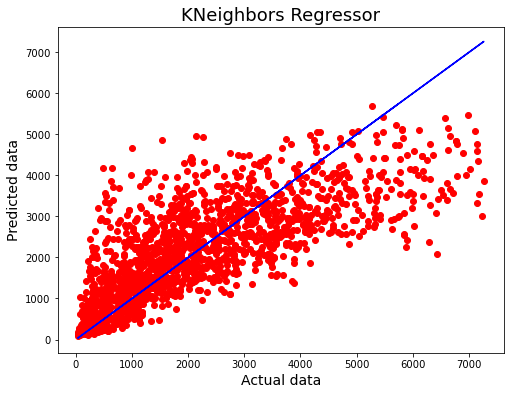

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=pred_decision, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('KNeighbors Regressor',fontsize=18)
plt.show()

# SVRegressor

In [ ]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error
svr =SVR()
parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]

clf = GridSearchCV(svr,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

Best parameters for SV Regressor

In [ ]:
svr =SVR(C=10000,gamma=0.01,kernel='rbf')
svr.fit(train_x,train_y)
svr.score(train_x,train_y)
pred_decision = svr.predict(test_x)
print('svr score',svr.score(train_x,train_y))
svrs = r2_score(test_y,pred_decision)
print('R2 Score:',svrs*100)

svrscore = cross_val_score(svr,x,y,cv=9)
svrc = svrscore.mean()
print('Cross Val Score:',svrc*100)
print("Mean squared error:",mean_squared_error(test_y,pred_decision))
print("Mean absolute error:",mean_absolute_error(test_y,pred_decision))

Cross Val Score:
R2 Score:   

Best Model is Decision Tree Regressor  as its r2 score and cross val score has less difference

# Model saving:

In [87]:
import pickle
filename = 'bigmart.pkl'
pickle.dump(dt, open(filename, 'wb'))

# Conclusion:

In [88]:
import numpy as np
a=np.array(test_y)
pred_decision =np.array(dt.predict(test_x))
df_com=pd.DataFrame({"original":a, "predicted": pred_decision},index=range(len(a)))
df_com

,original,predicted
0,449.4150,470.067001
1,1653.8472,1492.704486
2,1231.7300,3742.301143
3,765.6700,760.714018
4,1018.0082,1492.704486
...,...,...
1662,459.4020,470.067001
1663,5331.7264,3742.301143
1664,1150.5024,2014.882031
1665,3029.3900,3742.301143


Model is predicting value but not excatly equal to actual value.